Monte Carlo Example from RocketPy website: https://docs.rocketpy.org/en/latest/user/stochastic.html

In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.267 km (ASL): 9.5555 m/s²


Launch Site Details

Launch Date: 2025-10-15 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.267 km
Forecast Time Period: from 2025-10-14 12:00:00 to 2025-10-30 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 0.98 m/s
Surface Wind Direction: 185.39°
Surface Wind Heading: 5.39°
Surface Pressure: 853.05 hPa
Surface Temperature: 291.82 K
Surface Air Density: 1.018 kg/m³
Surface Speed of Sound: 342.45 m/s


Earth Model Details

Earth Radius at Launch s

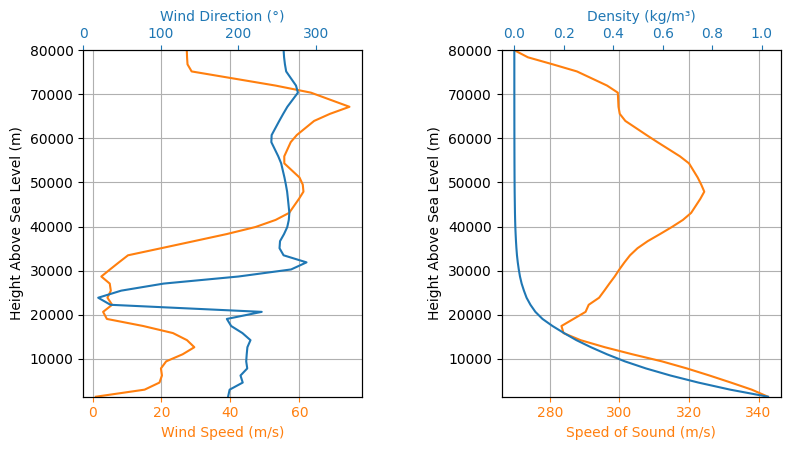

In [2]:
# Define Environment
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
) # Hour given in UTC time

env.set_atmospheric_model(type="Forecast", file="GFS")

env.info()

In [3]:
# defining a motor
from rocketpy import SolidMotor, StochasticSolidMotor

motor = SolidMotor(
    thrust_source = "../data/motors/cesaroni/Cesaroni_M1670.eng",
    dry_mass = 1.815,
    dry_inertia = (0.125, 0.125, 0.002),
    nozzle_radius = 33/1000,
    grain_number = 5,
    grain_density = 1815,
    grain_outer_radius = 33 /1000,
    grain_initial_inner_radius=15/1000,
    grain_initial_height=120/1000,
    grain_separation=5/1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11/1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Stochastic_motor = StochasticSolidMotor(
    solid_motor =motor,
    burn_start_time =(0, 0.1, "binomial"),
    grains_center_of_mass_position=0.001,
    grain_density = 10,
    grain_separation = 1 /1000,
    grain_initial_height=1/1000,
    grain_initial_inner_radius=0.375/1000,
    grain_outer_radius=0.375/1000,
    total_impulse=(6500, 100),
    throat_radius=0.5/1000,
    nozzle_radius = 0.5/1000,
    nozzle_position=0.001,
)

Stochastic_motor.visualize_attributes()

Reporting the attributes of the `StochasticSolidMotor` object:

Constant Attributes:
	burn_out_time                    3.9
	center_of_dry_mass_position      0.317
	coordinate_system_orientation    nozzle_to_combustion_chamber
	dry_I_11                         0.125
	dry_I_12                         0
	dry_I_13                         0
	dry_I_22                         0.125
	dry_I_23                         0
	dry_I_33                         0.002
	dry_mass                         1.815
	grain_number                     5
	interpolate                      linear
	thrust_source                    [[0, 0], [0.055, 100.0], [0.092, 1500.0], [0.1, 2000.0], [0.15, 2200.0], [0.2, 1800.0], [0.5, 1950.0], [1.0, 2034.0], [1.5, 2000.0], [2.0, 1900.0], [2.5, 1760.0], [2.9, 1700.0], [3.0, 1650.0], [3.3, 530.0], [3.4, 350.0], [3.9, 0.0]]

Stochastic Attributes:
	burn_start_time                  0.00000 ± 0.10000 (binomial)
	grain_density                    1815.00000 ± 10.00000 (normal)
	grain_ini

In [4]:
# Sampling a Stochastic Object
sampled_motor = Stochastic_motor.create_object()
print(sampled_motor)

print("Deterministic Motor with nominal values:\n")
motor.prints.all()
print("\n\nSampled Motor Considering uncertainties:\n")
sampled_motor.prints.all()

Deterministic Motor with nominal values:

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Structural Mass Ratio: 0.380
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



Sampled Motor Considering uncertainties:

Nozzle Details
Nozzle Radius: 0.03323916922216972 m
Nozzle Throat Radius: 0.010565512457930418 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.00364474421181779 m
Grain Density: 1803.8277636822636 kg/m3
Grain Outer Radius: 0.0329215511200576 m
Grain Inner Radius: 0.01523367757646646 m
Grain Height: 0.12068172208499388 m
Grain Volume: 0.000 m3
Grain Mass: 0.583 kg

Motor Deta